In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape(10000, 28, 28, 1)

2024-02-26 16:32:53.898141: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 16:32:53.930350: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 16:32:53.930391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 16:32:53.931404: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 16:32:53.936684: I tensorflow/core/platform/cpu_feature_guar

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Conv2D(64, (2, 2), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2024-02-26 16:32:55.613975: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 16:32:55.645663: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 16:32:55.645832: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
import time

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs = 5, verbose = 1,
                 validation_data = (X_test, y_test))

print('fit time : ', time.time() - start_time)

Epoch 1/5


2024-02-26 16:32:56.765984: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-26 16:32:56.871147: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-26 16:32:57.632734: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fad0c436d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-26 16:32:57.632772: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-26 16:32:57.637477: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708932777.714556    6814 device_compiler.h:186] Compiled clust

1875/1875 [==============================] - 9s 3ms/step - loss: 0.1147 - accuracy: 0.9640 - val_loss: 0.0420 - val_accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0444 - val_accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0270 - val_accuracy: 0.9915
fit time :  35.219751596450806


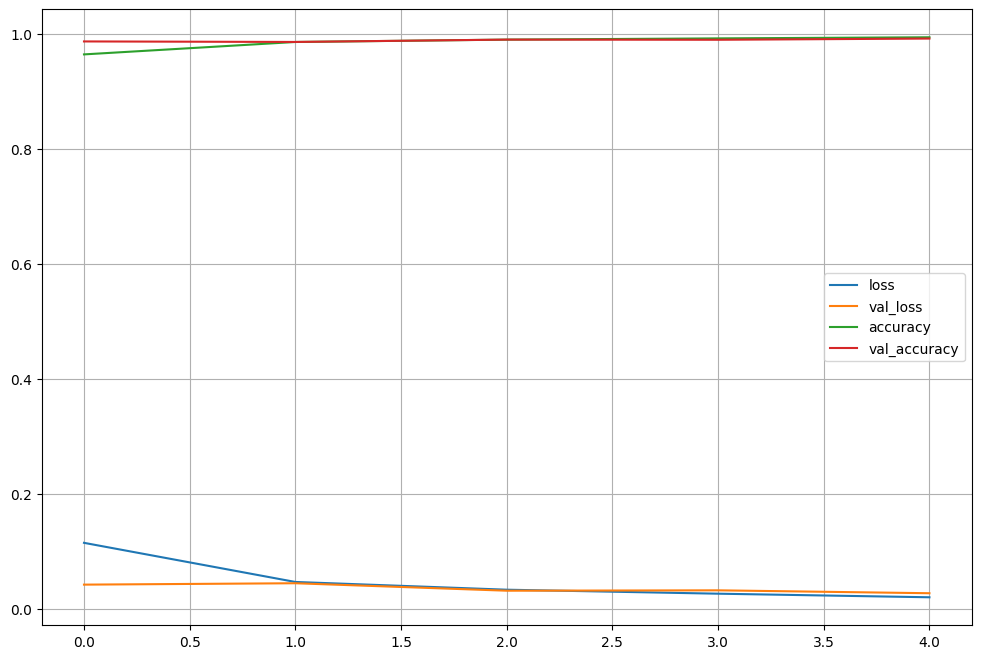

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [5]:
score = model.evaluate(X_test, y_test)

print('Test loss :', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9915
Test loss : 0.027027230709791183
Test accuracy :  0.9915000200271606


In [6]:
import numpy as np 

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [7]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

85

In [8]:
import random

samples = random.choices(population= wrong_result, k = 16)
samples

[939,
 2921,
 2447,
 2308,
 3558,
 2308,
 9692,
 2280,
 3555,
 2118,
 6576,
 9729,
 6560,
 9669,
 4176,
 3796]

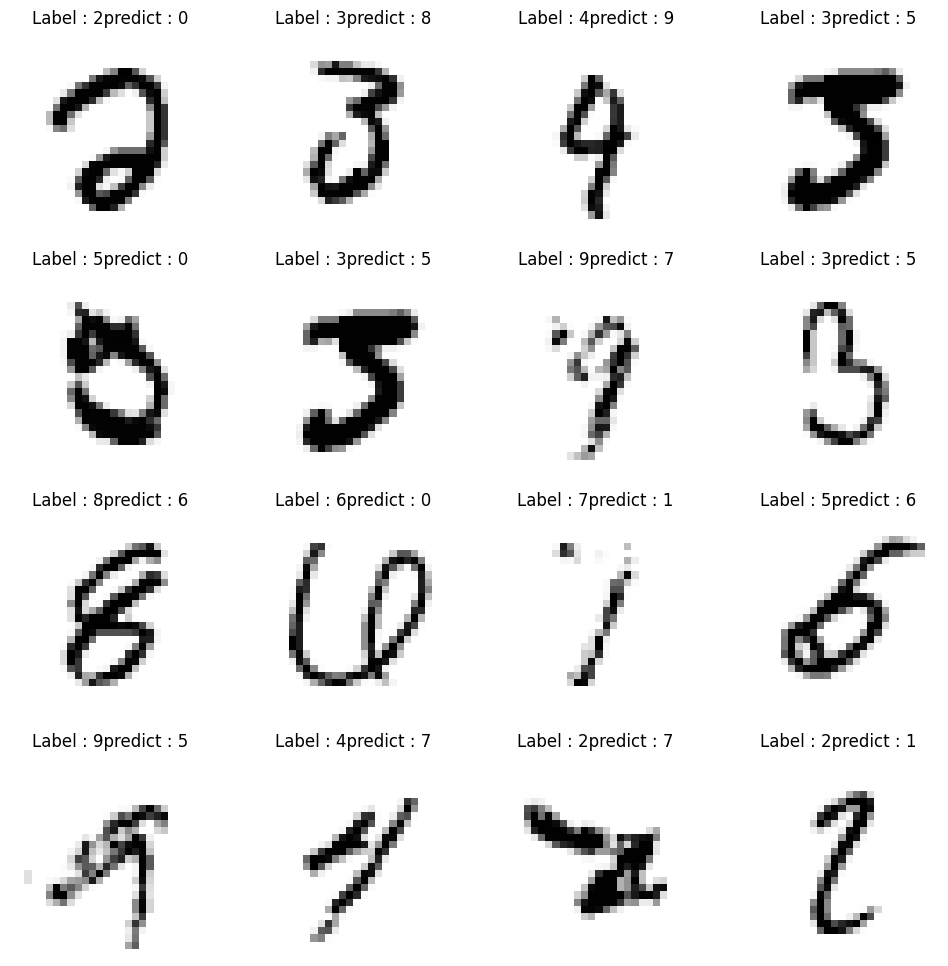

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize = (12, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'predict : ' + str(predicted_labels[n]))
    plt.axis('off')


plt.show()

In [10]:
model.save('MNIST_CNN_model.h5')

/home/kkyu/venv/deep_test/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
